# 3. Data Exploration

## Table of contents
- [Setup environment](#setup)
- [Question 1: Does the runtime of a movie or TV series depend on its classification?](#q1)
- [Question 2: Are there any correlations between age of a movie and its ratings?](#q2)
- [Question 3: For each genre, what would the correlation between tomatometer score and audience be ?](#q3)
- [Question 4: What genre would people/ critics prefer to watch (audience/ tomatometer count) ?](#q4)
- [Question 5: What is the highest rate for a genre and a classification to be in a movie together?](#q5)

## Setup environment <a class="anchor" id="setup"></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

## Question 1: Does the runtime of a movie or TV series depend on its classification? <a class="anchor" id="q1"></a>

In [17]:
df = pd.read_csv('../../data/processed/data.csv')

### Descriptive Statistics 

In [18]:
# Descriptive Statistics
descriptive_stats = df.groupby('classification')['runtime'].describe()
print("Descriptive Statistics:")
print(descriptive_stats)
print()

Descriptive Statistics:
                count        mean        std    min    25%    50%    75%   
classification                                                             
G                43.0  103.813953  26.903935   80.0   87.5   96.0  106.0  \
NC-17             1.0  166.000000        NaN  166.0  166.0  166.0  166.0   
Not Rated       226.0   99.274336  19.343100   44.0   90.0   97.0  109.0   
PG              175.0  104.622857  17.463773   39.0   93.0  102.0  113.0   
PG-13           310.0  120.900000  20.597695   72.0  107.0  118.0  134.0   
R               437.0  116.794050  21.726377   79.0  101.0  114.0  128.0   
TV14              4.0  102.000000  14.094916   85.0   95.5  102.0  108.5   
TVMA              9.0  101.666667  20.760539   52.0  103.0  108.0  113.0   
TVPG              5.0   95.000000  15.795569   69.0   92.0  101.0  104.0   

                  max  
classification         
G               222.0  
NC-17           166.0  
Not Rated       187.0  
PG              216

### Visual Exploration

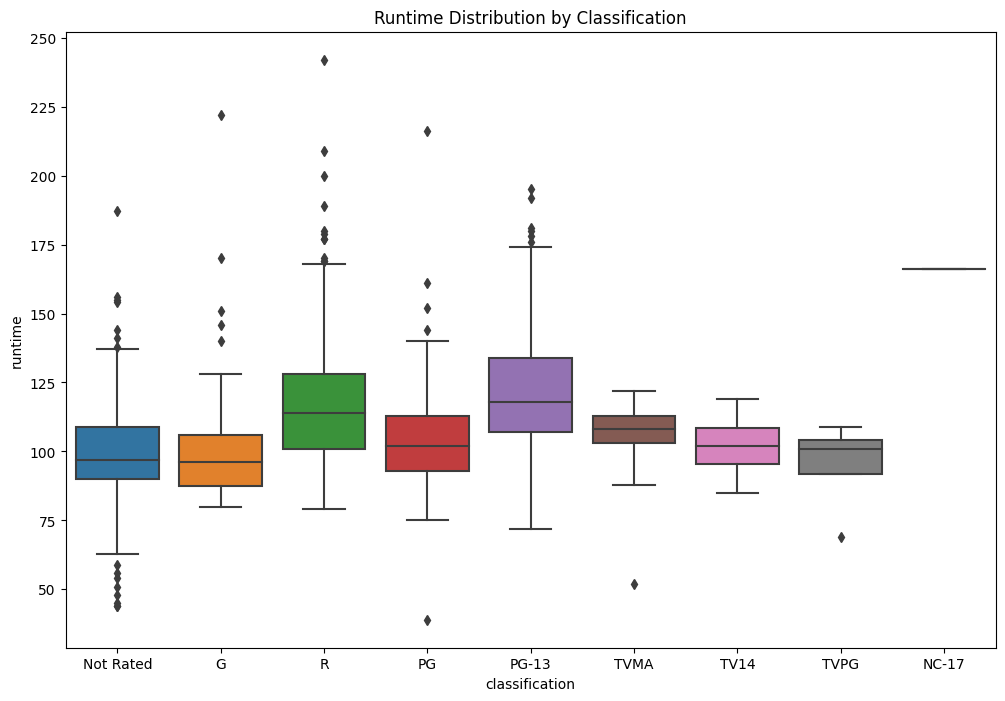

In [19]:
# Visual Exploration
plt.figure(figsize=(12, 8))
sns.boxplot(x='classification', y='runtime', data=df)
plt.title('Runtime Distribution by Classification')
plt.show()

### Statistical Testing

The **null hypothesis** in this context is:

H0: u1=u2=u3=...=uk
Where:
-   H0 is the null
-   u1,u2,...,uk:are the mean values of the runtime for different classifications of movies or TV programs.
This null hypothesis assumes that there is no significant difference in runtime among different classifications.

In [20]:
result = f_oneway(
    df[df['classification'] == 'PG']['runtime'],
    df[df['classification'] == 'PG-13']['runtime'],
    df[df['classification'] == 'R']['runtime'],
    df[df['classification'] == 'G']['runtime'],
    df[df['classification'] == 'NC-17']['runtime'],
    df[df['classification'] == 'TV14']['runtime'],
    df[df['classification'] == 'TVMA']['runtime'],
    df[df['classification'] == 'TVPG']['runtime'],
)

print("ANOVA p-value:", result.pvalue)

ANOVA p-value: 1.2597456890142491e-17


### **Conclusion**

Based on the low p-value from the ANOVA test, we can reject the null hypothesis that there are no significant differences in runtime between classifications. Therefore, we can conclude that the runtime of a movie or TV series depends on its classification.

In simpler terms, the classification of a movie or TV series appears to have a statistically significant impact on its runtime. Further analysis or post-hoc tests may be conducted to identify which specific classifications differ from each other in terms of runtime.

## Question 2: Are there any correlations between age of a movie and its ratings? <a class="anchor" id="q2"></a>
- **This question will help** identify if age of a movie is a factor in ratings or not.
- We'll start by creating a new column ```age```.
- Then, we'll draw two plots comparing `age` to `tomatometer_score` and `audience_score`.

### Calculate age

In [21]:
curr_year = datetime.date.today().year
df['age'] = curr_year - df['release_year']
df['age']

0        2
1       83
2        4
3        0
4        4
        ..
1210     3
1211    71
1212    24
1213    51
1214    48
Name: age, Length: 1215, dtype: int64

### Plotting

Text(0, 0.5, 'age')

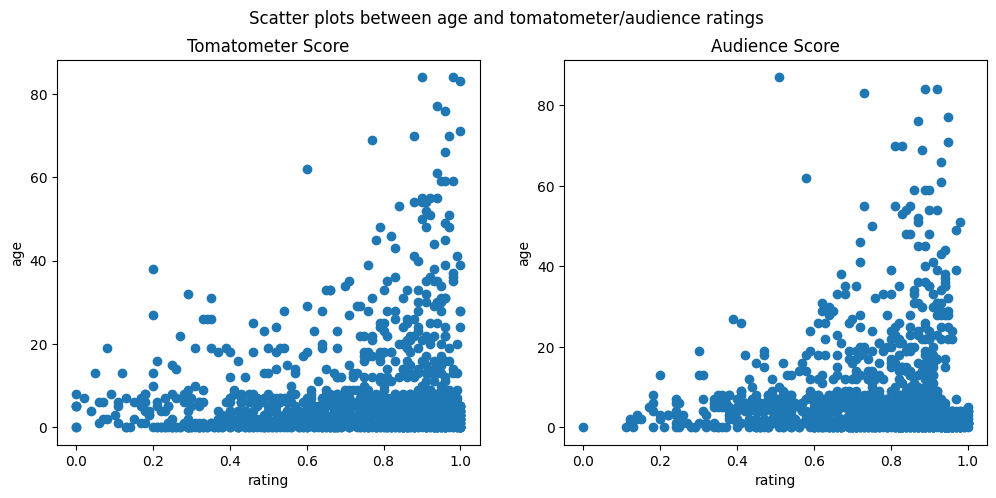

In [22]:
fig = plt.figure(figsize=(12,5))
axs = fig.subplots(1,2).flatten()
fig.suptitle('Scatter plots between age and tomatometer/audience ratings')
#age v. tomatometer_score
axs[0].scatter(df['tomatometer_score'], df['age'])
axs[0].set(title='Tomatometer Score')
axs[0].set_xlabel('rating')
axs[0].set_ylabel('age')

axs[1].scatter(df['audience_score'], df['age'])
axs[1].set(title='Audience Score')
axs[1].set_xlabel('rating')
axs[1].set_ylabel('age')

### **Conclusion**
- In general, movies with **a young age ($\le$ 10 years)** have a wide range of ratings (0.4-1.0). So, for recently published movie, its age has **little effect** to its ratings.
- For **older movies ($\gt$ 10 years)**, however, they are more likely to **recieve a better rating the older they are**.  
    - This is possibly due to the fact that older movies are favored because they are "vintage", and "nolstalgic".
- **To sum up,** age of a movie has little correlation with its ratings when **these movies are recently published**. For older movies, this correlation is much stronger.

## Question 3: For each genre, what would the correlation between tomatometer score and audience be ? <a class="anchor" id="q3"></a>

**Purpose**: To see if there are any genres that are fit for both critics and audience.

### Prepare data for exploration

We need to find the missing ration for tomato meter and audience score. 

In [23]:
tomato_missing = df["tomatometer_score"].isna().sum() / len(df)
audience_missing = df["audience_score"].isna().sum() / len(df)
print(f"Tomatometer missing: {tomato_missing:.2%}")
print(f"Audience missing: {audience_missing:.2%}")

Tomatometer missing: 4.36%
Audience missing: 1.89%


These values are not too big, so we can fill them with the mean of the column.

In [24]:
df["tomatometer_score"].fillna(df["tomatometer_score"].mean(), inplace=True)
df["audience_score"].fillna(df["audience_score"].mean(), inplace=True)

In [25]:
genres = np.unique(df['genre'])
print(f'Number of genres: {len(genres)}')
print(f'Genres: {genres}')

Number of genres: 21
Genres: ['Action' 'Adventure' 'Anime' 'Biography' 'Comedy' 'Crime' 'Documentary'
 'Drama' 'Fantasy' 'Game show' 'History' 'Holiday' 'Horror'
 'Kids & family' 'Music' 'Musical' 'Mystery & thriller' 'Romance' 'Sci-fi'
 'War' 'Western']


We see that there are 21 genres in total and there are 2 genres that are related to each other. They are "Music" and "Musical". In this case, we really don't need to have both of them. So, we will combine them into one genre called "Music/Musical".

In [26]:
df['genre'] = df['genre'].replace(["Music", "Musical"], "Music/ Musical")
genres = np.unique(df['genre'])

Now, we need to count the number of movies in each genre. We will use this information to see if there are any genres that should be removed from the dataset.

In [27]:
for genre in genres:
    print(f'Number of {genre} movies: {len(df[df["genre"] == genre])}')

Number of Action movies: 107
Number of Adventure movies: 22
Number of Anime movies: 2
Number of Biography movies: 71
Number of Comedy movies: 107
Number of Crime movies: 45
Number of Documentary movies: 95
Number of Drama movies: 68
Number of Fantasy movies: 30
Number of Game show movies: 1
Number of History movies: 42
Number of Holiday movies: 75
Number of Horror movies: 79
Number of Kids & family movies: 155
Number of Music/ Musical movies: 42
Number of Mystery & thriller movies: 67
Number of Romance movies: 60
Number of Sci-fi movies: 73
Number of War movies: 36
Number of Western movies: 38


We see that there are 2 genres that have less than 10 movies. They are "Anime" and "Game show". We will not consider these genres in our analysis.

In [28]:
genres = np.delete(genres, np.where((genres == "Anime") | (genres == "Game show")))
print(genres)

['Action' 'Adventure' 'Biography' 'Comedy' 'Crime' 'Documentary' 'Drama'
 'Fantasy' 'History' 'Holiday' 'Horror' 'Kids & family' 'Music/ Musical'
 'Mystery & thriller' 'Romance' 'Sci-fi' 'War' 'Western']


Next, we create a dataframe that contains the correlation between tomatometer score and audience score for each genre. We will use this dataframe to create a bar chart.

In [29]:
df_genre = pd.DataFrame(columns=['Correlation'], index=genres)
for genre in genres:
    df_genre.loc[genre] = df[df['genre'] == genre]['tomatometer_score'].corr(df[df['genre'] == genre]['audience_score'])
df_genre.sort_values(by=['Correlation'], inplace=True)
df_genre

,Correlation
Adventure,-0.009375
Drama,0.339137
Horror,0.35832
Documentary,0.364369
Biography,0.397751
Comedy,0.447956
Romance,0.465817
War,0.494754
History,0.530546
Holiday,0.537941


[Text(0, 0, 'Adventure'),
 Text(1, 0, 'Drama'),
 Text(2, 0, 'Horror'),
 Text(3, 0, 'Documentary'),
 Text(4, 0, 'Biography'),
 Text(5, 0, 'Comedy'),
 Text(6, 0, 'Romance'),
 Text(7, 0, 'War'),
 Text(8, 0, 'History'),
 Text(9, 0, 'Holiday'),
 Text(10, 0, 'Sci-fi'),
 Text(11, 0, 'Western'),
 Text(12, 0, 'Action'),
 Text(13, 0, 'Crime'),
 Text(14, 0, 'Fantasy'),
 Text(15, 0, 'Mystery & thriller'),
 Text(16, 0, 'Kids & family'),
 Text(17, 0, 'Music/ Musical')]

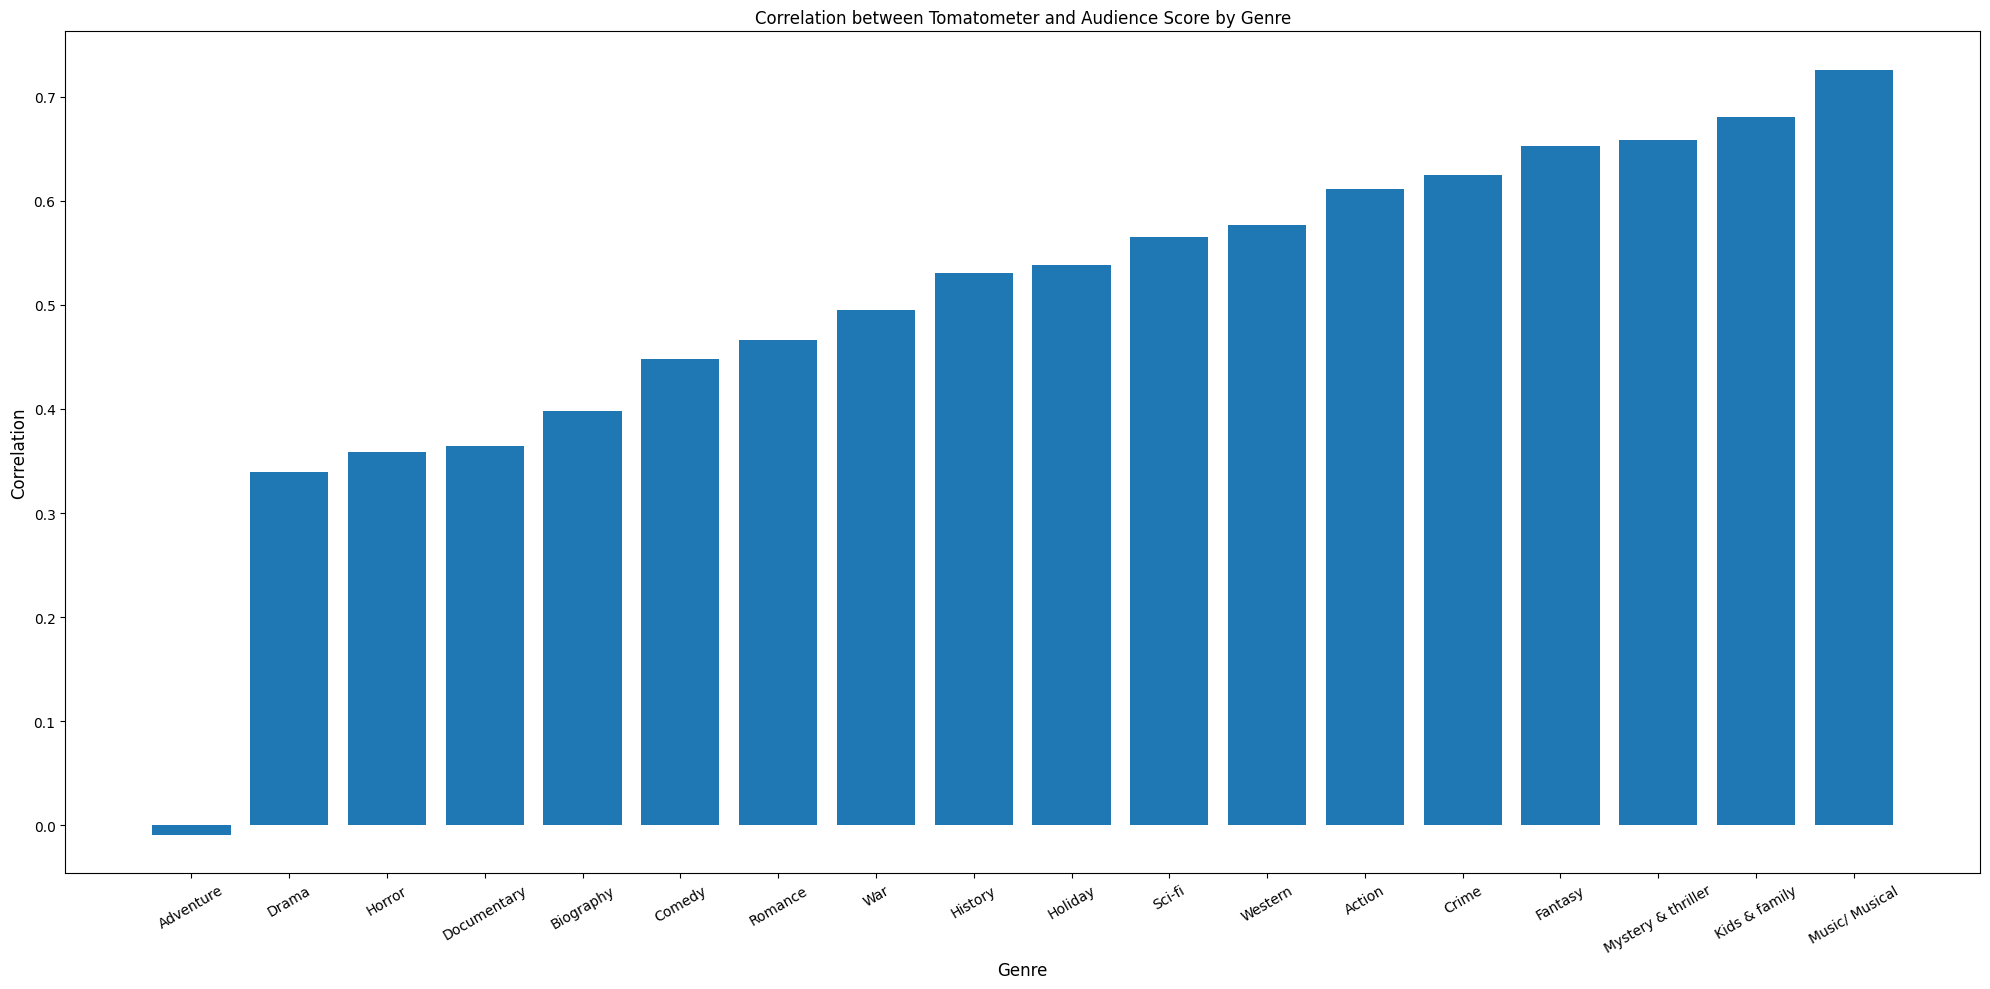

In [30]:
fig, ax = plt.subplots(figsize=(20, 10), tight_layout=True)

ax.bar(df_genre.index, df_genre['Correlation'])
ax.set_title('Correlation between Tomatometer and Audience Score by Genre')
ax.set_xlabel('Genre', fontsize=12)
ax.set_ylabel('Correlation', fontsize=12)
ax.set_xticklabels(df_genre.index, rotation=30)

### **Conclusion**
**Insight**: The genre that has the highest correlation between tomatometer score and audience score is "Music/ Musical". The genre that has the lowest correlation between tomatometer score and audience score is "Adventure". Apart from these two genres, the rest of the genres have a correlation lies between 0.3 and 0.7, which can be considered as a moderate correlation. Only the "Adventure" genre has a negative correlation. 

**Why Music/Musical has the highest correlation?**
- Musicals allow for a wide range of emotions to be conveyed through song and dance. This can be a powerful way to connect with an audience and create an immersive experience. 
- Musicals often tell stories that are both entertaining and relatable, making them easy to enjoy. 
- The music in musicals is often catchy and memorable, making them enjoyable to listen to even after the show is over.

**Why Adventure has the lowest correlation?**
- While adventure movies are often exciting and fun to watch, they can also be quite predictable, which makes them less engaging for critics. 
- Audiences tend to enjoy adventure movies more than critics because they are less concerned with the plot and more interested in the action and adventure.
- Critics are often more interested in the plot and character development, which is not a strong point for adventure movies. 

## Question 4: What genre would people/ critics prefer to watch (audience/ tomatometer count) ? <a class="anchor" id="q4"></a>

To see what genres that people'd prefer to watch, first we'll focus on 2 fields: audience_count and tomatometer_count since the number of rating for each movie would present the number of people that have watched that movie. First, we'll consider the total rating count of both audience and tomatometer. We can do this by group the movies by genre and count each genre sum of ratings. 

In [31]:
df_copy = df.copy()
df_copy['Total rating count'] = df_copy['audience_count'] + df_copy['tomatometer_count']
grouped_df = df_copy.groupby('genre').sum()
df_sorted = grouped_df.sort_values(by='Total rating count', ascending=False)

print('median:', df_sorted['Total rating count'].median())

median: 1921094.0


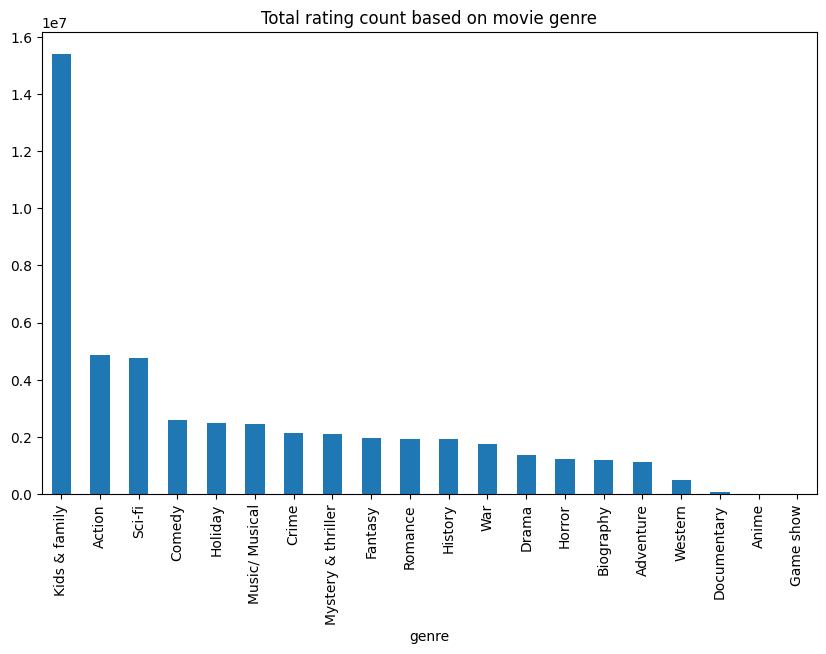

In [32]:
#draw bar chart of Total rating count based on movie genre
plt.figure(figsize=(10,6))
df_sorted['Total rating count'].plot(kind='bar')
plt.title('Total rating count based on movie genre')
plt.show()

### **Conclusion** 
As we can see there's a big gap between these genres number of ratings. <br>
<li><b>Kids & family</b> has the largest count with more than 15 million ratings, which is about 7.5 times higher than the medium number of rating. This suggests that movies in this genre tend to attract a large viewership, likely due to their appeal to both children and families. 
<li><b>Action</b> and <b>Sci-fi</b> come next in the top total rating count, with 4,857,929 and 4,747,168 respectively. This may indicate a strong interest among audiences for movies that offer thrilling action sequences and futuristic or science fiction elements. 
<li>Comedy, Holiday, Musical, Crime, Mystery & thriller, Fantasy, Romance, History and War also have notable total rating counts, this suggest these genres have a substantial following. 
<li>The other genres like Documentary, Music and Anime, Gameshow have least rating count, this may indicate these genres are specifically appealed to viewers. 

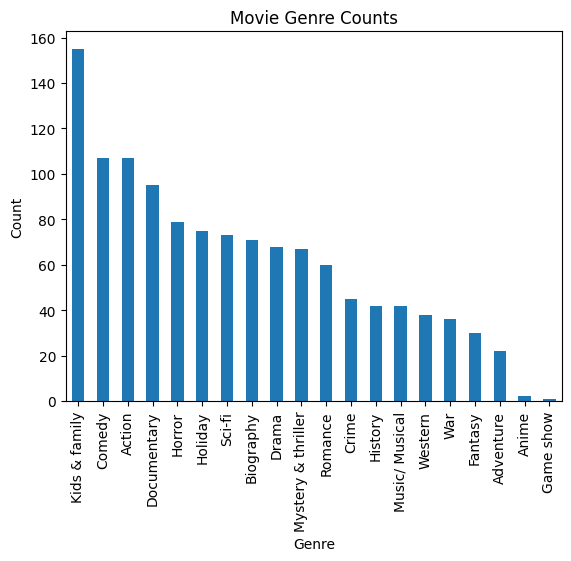

In [33]:
movie_genre_count = df['genre'].value_counts()
movie_genre_count.plot(kind='bar')

plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Movie Genre Counts')

plt.show()

We can examine a further reason for people prefer to watch a certain movie genres more than others by examining the number of movies in each genre. Some of the genres are in their order as the Total rating count, but some like Documentary, Horror still stand in top 5 genre movie counts. So these genres are really not appealing to a large number of viewers

## Question 5: What is the highest rate for a genre and a classification to be in a movie together? <a class="anchor" id="q5"></a>

This question may help us answer how a genre and a classification mostl likely be in a movie together to see the pattern between movie genre and classification. First, we'll count the number of genre and classification with it's movie count.

In [34]:
genre_classification_counts = df.groupby(['genre', 'classification']).size()
print(genre_classification_counts)

genre      classification
Action     Not Rated         13
           PG                 2
           PG-13             58
           R                 34
Adventure  G                  1
                             ..
Western    Not Rated          5
           PG                 1
           PG-13              6
           R                 24
           TVMA               1
Length: 90, dtype: int64


So we have 91 combination of Action and classification movies. Now, we'll sort the genre and classification counts to see the top highest count.

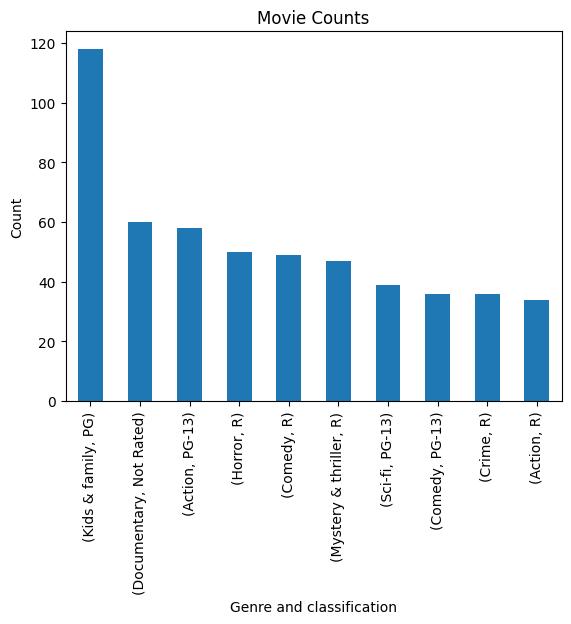

118


In [35]:
sorted_counts = genre_classification_counts.sort_values(ascending=False)
sorted_counts[:10].plot(kind='bar')
plt.xlabel('Genre and classification')
plt.ylabel('Count')
plt.title('Movie Counts')

plt.show()
print(sorted_counts[0])

### **Conclusion**
We can see genre <b>Kids & family</b>, and classification <b>PG</b> has the largest movie number with <b>118</b> movies. So this suggests movies with 'Kids & family, PG' genre are suitable for general viewing, but some scenes may be unsuitable for young children.

In [36]:
total_count = genre_classification_counts.sum()
percentages = (genre_classification_counts / total_count) * 100
sorted_percentages = percentages.sort_values(ascending=False)
print(sorted_percentages)

genre           classification
Kids & family   PG                9.711934
Documentary     Not Rated         4.938272
Action          PG-13             4.773663
Horror          R                 4.115226
Comedy          R                 4.032922
                                    ...   
                TVMA              0.082305
Horror          TVMA              0.082305
Music/ Musical  TV14              0.082305
Comedy          TV14              0.082305
Western         TVMA              0.082305
Length: 90, dtype: float64


So there's about <b>10%</b> for a movie to have <b>Kids & family</b> genre and <b>PG</b> classification to stand together